In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.feature_selection import SelectKBest,SelectFwe
from sklearn.feature_selection import f_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV,train_test_split

In [4]:
##Importing datasets

In [5]:
bank_= pd.read_csv("banks_assignment.txt",sep=';')
bank_.to_csv('banks_assignment.csv',index = None)  
bank=bank_.copy()

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
##Checking null values

In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
##Mapping yes and no categories to 1 and 0 of the output variable and storing the result in a new column output.

In [10]:
bank['outcome']=bank['y'].map({'no':0,'yes':1})
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [11]:
##Encoding categorical values

In [12]:
bank['default']=bank.default.map({'yes':1,'no':0})
bank['housing']=bank.housing.map({'yes':1,'no':0})
bank['loan']=bank.loan.map({'yes':1,'no':0})
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,0


In [13]:
x=bank.iloc[:,:-2]
x.values

array([[58, 'management', 'married', ..., -1, 0, 'unknown'],
       [44, 'technician', 'single', ..., -1, 0, 'unknown'],
       [33, 'entrepreneur', 'married', ..., -1, 0, 'unknown'],
       ...,
       [72, 'retired', 'married', ..., 184, 3, 'success'],
       [57, 'blue-collar', 'married', ..., -1, 0, 'unknown'],
       [37, 'entrepreneur', 'married', ..., 188, 11, 'other']],
      dtype=object)

In [14]:
df=pd.get_dummies(x,drop_first=True)

In [15]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [16]:
y=bank['outcome']

In [17]:
##Selecting Top 15 features based on the anova scores of each dependent feature with the response feature

In [18]:
fs = SelectKBest(f_classif, k=20).fit(df,y)

In [19]:
fs_df=pd.DataFrame({'Feature':list(df.columns),
                    'scores':fs.scores_
                 })
fs_df.sort_values(by='scores',ascending=False)

,Feature,scores
6,duration,8333.761148
40,poutcome_success,4697.113837
41,poutcome_unknown,1297.815887
27,contact_unknown,1053.932776
3,housing,892.950576
34,month_mar,770.566237
37,month_oct,759.412860
38,month_sep,696.599372
8,pdays,490.696563
35,month_may,480.019957


In [20]:
x_anova=fs.transform(df)
x_anova1=pd.DataFrame(x_anova)
x_anova1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0,261,1,-1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1
1,1,0,151,1,-1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,1,0,92,1,-1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
4,0,0,198,1,-1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [21]:
y=bank['outcome'].values

In [22]:
##Splitting the data into train and test sets.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_anova,y)

In [24]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

In [25]:
param_grid=[{'penalty':['l1','l2','none'],
              'C':np.logspace(-4,4,20),
                }]

In [38]:
clf=GridSearchCV(logmodel,param_grid=param_grid,cv=2,verbose=True,n_jobs=-1) ##Hyperparameter tuning with range of values

In [27]:
best_clf=clf.fit(x_train,y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   36.9s finished


In [28]:
ypred=best_clf.predict(x_test)

In [30]:
confusionmatrix_=confusion_matrix(y_test,ypred)
print(confusionmatrix_)

[[9705  253]
 [ 895  450]]


In [32]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9958
           1       0.64      0.33      0.44      1345

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.69     11303
weighted avg       0.88      0.90      0.88     11303



In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

In [36]:
fpr,tpr,thresholds=roc_curve(y_test,best_clf.predict_proba(x_test)[:,1])
auc=roc_auc_score(y_test,ypred)

In [37]:
auc

0.6545828912659937

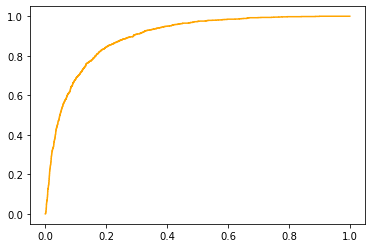

In [39]:
plt.plot(fpr,tpr,color='orange',label='logit model(area=%0.2f)'%auc)